In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('../data/raw/ecommerce.csv', encoding='latin1', encoding_errors='replace')
pd.set_option('display.max_columns', None)

In [32]:
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [34]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [38]:
df.info()
print('\nMissing values per column:')
print(df.isnull().sum())

# numeric stats
df.describe(include=[np.number]).T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [36]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique")
    print(df[col].dropna().unique()[:10])
    print('---')


InvoiceNo: 25900 unique
['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
---
StockCode: 4070 unique
['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
---
Description: 4223 unique
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
---
InvoiceDate: 23260 unique
['12/1/2010 8:26' '12/1/2010 8:28' '12/1/2010 8:34' '12/1/2010 8:35'
 '12/1/2010 8:45' '12/1/2010 9:00' '12/1/2010 9:01' '12/1/2010 9:02'
 '12/1/2010 9:09' '12/1/2010 9:32']
---
Country: 38 unique
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland']
---


In [37]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
print('InvoiceDate nulls after conversion:', df['InvoiceDate'].isnull().sum())
df.head()


InvoiceDate nulls after conversion: 0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [39]:
raw_df = df.copy()   # keep raw copy
print('Quantity min, max:', df['Quantity'].min(), df['Quantity'].max())
print('UnitPrice min, max:', df['UnitPrice'].min(), df['UnitPrice'].max())

neg_q = df[df['Quantity'] <= 0]
neg_p = df[df['UnitPrice'] <= 0]
print('Rows with non-positive Quantity:', len(neg_q))
print('Rows with non-positive UnitPrice:', len(neg_p))


Quantity min, max: -80995 80995
UnitPrice min, max: -11062.06 38970.0
Rows with non-positive Quantity: 10624
Rows with non-positive UnitPrice: 2517


In [40]:
df = df[df['Quantity'] > 0].copy()
df = df[df['UnitPrice'] > 0].copy()
print('After removing non-positive rows:', df.shape)


After removing non-positive rows: (530104, 8)


In [41]:
print('Missing CustomerID before:', raw_df['CustomerID'].isnull().sum())
df = df.dropna(subset=['CustomerID']).copy()
print('After dropping missing CustomerID:', df.shape)


Missing CustomerID before: 135080
After dropping missing CustomerID: (397884, 8)


In [42]:
before = len(df)
df = df.drop_duplicates().copy()
after = len(df)
print(f'Dropped {before-after} duplicate rows')


Dropped 5192 duplicate rows


In [43]:
def optimize_dataframe(df_in):
    df = df_in.copy()
    for col in df.columns:
        if pd.api.types.is_integer_dtype(df[col].dtype):
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif pd.api.types.is_float_dtype(df[col].dtype):
            df[col] = pd.to_numeric(df[col], downcast='float')
        elif pd.api.types.is_object_dtype(df[col].dtype):
            if df[col].nunique() / len(df) < 0.5:
                df[col] = df[col].astype('category')
    return df

print('Memory before (sample):')
display(raw_df.memory_usage(deep=True).head())
df = optimize_dataframe(df)
print('Memory after (sample):')
display(df.memory_usage(deep=True).head())


Memory before (sample):


Index               128
InvoiceNo      34149558
StockCode      33645420
Description    45254148
Quantity        4335272
dtype: int64

Memory after (sample):


Index          3141536
InvoiceNo      2481324
StockCode      1145621
Description    1243256
Quantity       1570768
dtype: int64

In [44]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
print('Total Revenue:', df['Revenue'].sum())

country_rev = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
country_rev.head(10)


Total Revenue: 8887208.837974273


/var/folders/0l/yq7jt8x52s14wqw5c3p7c8hc0000gn/T/ipykernel_852/1911389626.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_rev = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)


Country
United Kingdom    7.285025e+06
Netherlands       2.854463e+05
EIRE              2.652625e+05
Germany           2.286784e+05
France            2.089343e+05
Australia         1.384538e+05
Spain             6.155856e+04
Switzerland       5.644395e+04
Belgium           4.119634e+04
Sweden            3.836783e+04
Name: Revenue, dtype: float64

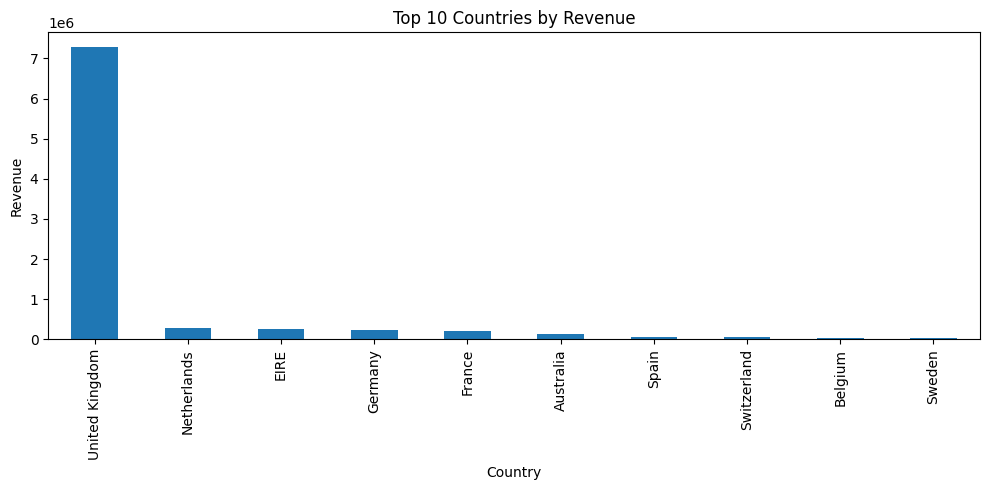

In [45]:
top10 = country_rev.head(10)
plt.figure(figsize=(10,5))
top10.plot(kind='bar')
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


In [46]:
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products_qty


/var/folders/0l/yq7jt8x52s14wqw5c3p7c8hc0000gn/T/ipykernel_852/3041972395.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int32

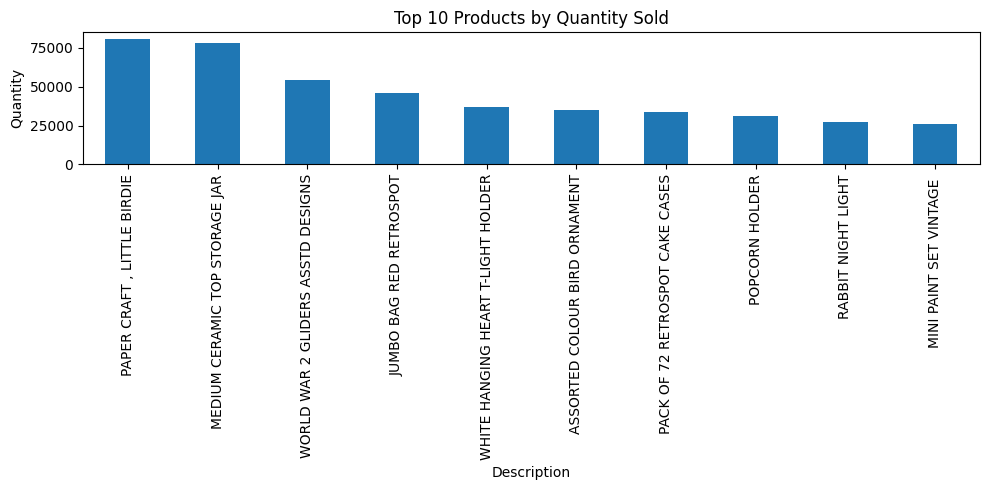

In [47]:
plt.figure(figsize=(10,5))
top_products_qty.plot(kind='bar')
plt.title('Top 10 Products by Quantity Sold')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()


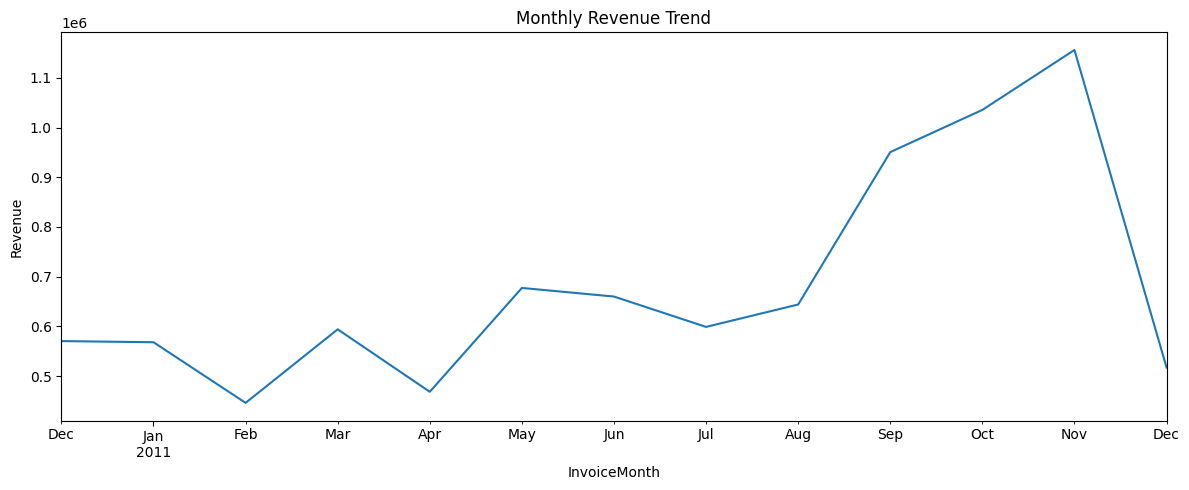

In [48]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly = df.groupby('InvoiceMonth')['Revenue'].sum().sort_index()
monthly_plot = monthly.copy()
monthly_plot.index = monthly_plot.index.to_timestamp()

plt.figure(figsize=(12,5))
monthly_plot.plot()
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()
